# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [1]:
# Your import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
# from scikitlearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, log_loss, roc_curve, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load the Pokémon dataset from the csv file
pokemon_data = pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [2]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# Select all features + derived  
features = ['sp_attack', 'sp_defense', 'sp_attack_to_sp_defense_ratio', 'attack', 'defense', 'speed', 'total_bs',
            'capture_rt', 'type']
# target: Legendary 
target = 'legendary'

# Set X and Y
X = pokemon_data[features]
y = pokemon_data[target]

### 2.2 Data Transformation Using ColumnTransformer

In [3]:
# Categorical and numerical columns
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
numeric_transformer =  MaxAbsScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['sp_attack', 'sp_defense',
                                  'sp_attack_to_sp_defense_ratio', 'attack',
                                  'defense', 'speed', 'total_bs',
                                  'capture_rt']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [4]:
# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)
# Result:
# - X_train, y_train: Training set (70% of the data)
# - X_temp, y_temp: Temporary set (30% of the data)

In [5]:
# Please use train_test_split to prepare your data
# Step 2: Second split to create validation and test sets from the temporary set
# test_size=0.5: Splits the remaining 30% of the data equally into validation (15%) and test (15%) sets
# random_state=42: Ensures reproducibility
# stratify=y_temp: Maintains the class distribution in the split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.20618557, 0.17391304, 0.27007299, 0.35135135, 0.2826087 ,
         0.08333333, 0.40384615, 0.74509804, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.33505155, 0.30434783, 0.25078206, 0.45405405, 0.30434783,
         0.28333333, 0.52564103, 0.17647059, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.56701031, 0.41304348, 0.3127161 , 0.51351351, 0.36956522,
         0.43888889, 0.68589744, 0.17647059, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [6]:
# Please build your Logistic Regression model

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=300, random_state=42)
logistic_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
#AUC
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)
#Accuracy Score
y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)

print("Jace Marden : Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Jace Marden : Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [7]:
# Please build your Multi-Layer Perceptron model
# Train MLP Classifier
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
#AUC
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)
#Accuracy
y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Jace Marden : MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Jace Marden : MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9800
Validation accuracy: 0.9750


C:\Users\stell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [8]:
#Turn off warning due to loop
warnings.filterwarnings("ignore")

# Please record your loss of logistic regression with 500 iterations
# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    max_iter=1,  # Run one iteration at a time
    solver='saga',  # The saga solver supports recording loss values during optimization
    random_state=42,
    warm_start=True  # Continue training from the last state, which allow manually record the loss at each iteration
)

# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(1, 501):  # 500 iterations
    logistic_model.fit(X_train, y_train)  # Fit one iteration
    # Predict probabilities to calculate log loss
    y_train_prob = logistic_model.predict_proba(X_train)
    # Calculate the log loss and append to the loss curve
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)

#Turn back on warnings
warnings.filterwarnings("default")

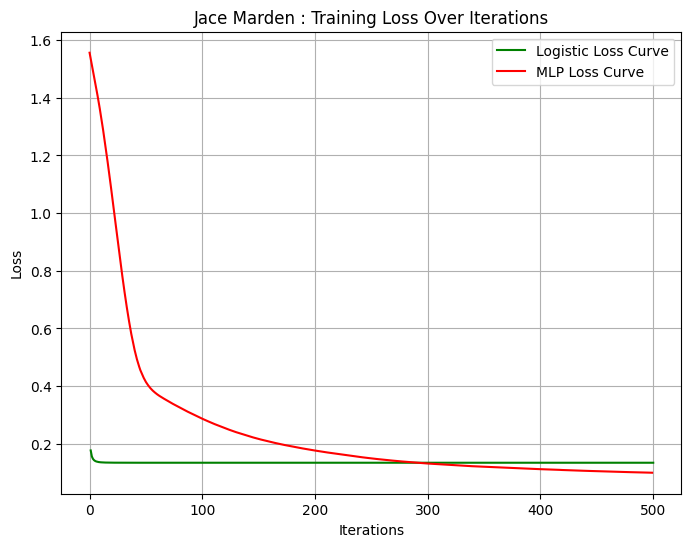

In [9]:
# Extract loss during MLP training
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve", color="green")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Jace Marden : Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()

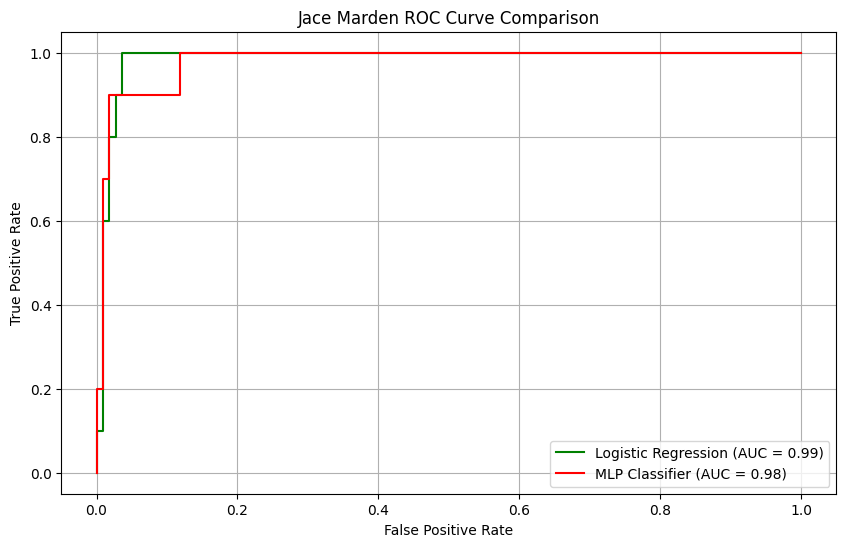

In [10]:
# Plot ROC Curve Comparison
# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
 
# please set color of Logistic as green, set MLP as red.
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color="green")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})", color="red")
plt.title("Jace Marden ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

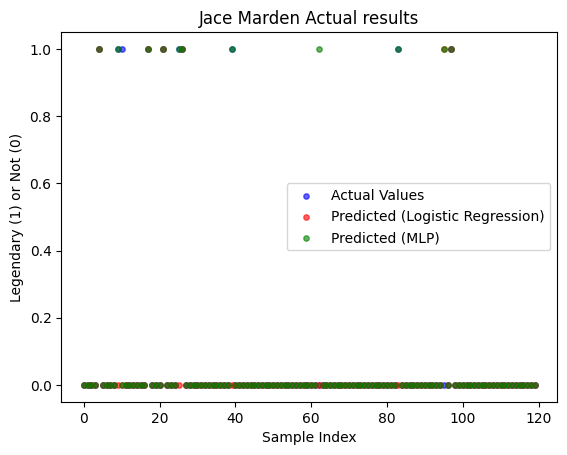

In [11]:
# Please plot the Actual data and Predicted for Logistic and MLP model
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Jace Marden Actual results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

### Confusion Matrices

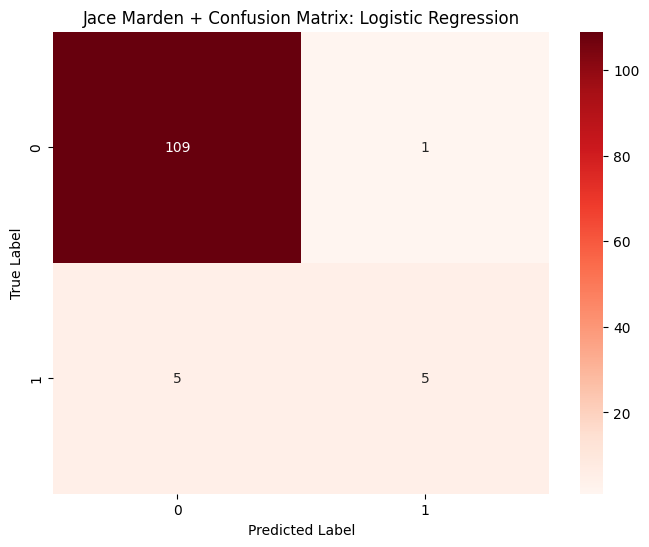

In [15]:
# plot Logistic Regression
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Reds")
plt.title("Jace Marden + Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

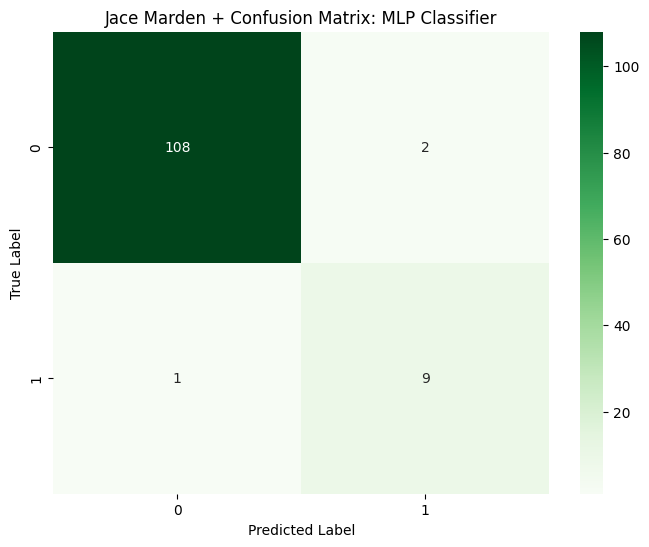

In [13]:
# plot MLP
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Jace Marden + Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusion

In [14]:
# Please compare the difference and common between Logistic results and MLP results
# Logistic regression has 1 more in 0/0, 4 less in 1/1, 4 more in 1/0, and 1 less 0/1
# The predicted for both is primary 0 (not legendary), with some sparatic 1's (legendary)
#     However MLP predicts twice the number of legendaries
# So I would say MLP has a tendancy to be much more accurate since 1/0 and 0/1 are not good
#     MLP has half the incorrect actual/predicted values that logistic has
# MLP has a better final loss but a worse ROC curve